<a href="https://colab.research.google.com/github/dikoharyadhanto/Geemap_for_Python/blob/main/003_Converting_data_formats_between_GeoJSON_and_Earth_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Libraries

In [1]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.1 MB/s eta 0:00:00


#Import Library

In [23]:
import geemap
import json
import os
import requests
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON
import geopandas as gpd
import zipfile
import shapefile
from json import dumps
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON

# Access the Shapefile Data

In [4]:
#Extract Dataset ZIP
zip_ref = zipfile.ZipFile("/content/DKI_Jakarta_Kec2.zip", 'r')
zip_ref.extractall("/tmp/DKI_Jakarta_Kec2")
zip_ref.close()

In [5]:
url = '/tmp/DKI_Jakarta_Kec2/DKI_Jakarta_Kec2/DKI_Jakarta_Kec2.shp'

In [6]:
# Upload the shapefile you need to used first then read it with geopandas
shapefile = gpd.read_file(url)
shapefile.head()

WADMKC                WADMKK    SHAPE_Leng    SHAPE_Area  \
0         Cakung    Kota Jakarta Timur  29961.688685  4.122511e+07   
1  Cempaka Putih    Kota Jakarta Pusat  10433.927208  4.371817e+06   
2     Cengkareng    Kota Jakarta Barat  30938.416122  2.679636e+07   
3       Cilandak  Kota Jakarta Selatan  23750.506392  1.833891e+07   
4      Cilincing    Kota Jakarta Utara  37101.843694  4.209390e+07   

                                            geometry  
0  POLYGON Z ((11904518.702 -686484.488 0.000, 11...  
1  POLYGON Z ((11897270.467 -689383.218 0.000, 11...  
2  POLYGON Z ((11880769.468 -682939.113 0.000, 11...  
3  POLYGON Z ((11887806.863 -698682.194 0.000, 11...  
4  POLYGON Z ((11907749.194 -679408.949 0.000, 11...

<Axes: >

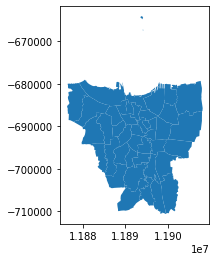

In [7]:
#plot shapefile
shapefile.plot()

#Projection

## Check Current Projection

In [8]:
#Checking the current projections
current_crs = shapefile.crs
current_crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

##Reprojection

<Axes: >

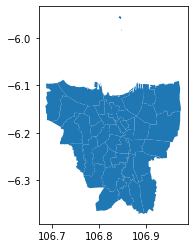

In [9]:
#change current projection to epsg:4236 because ipyflet only show spatial data with that projection
shapefile.to_crs(epsg=4326, inplace=True) #check into https://epsg.io/
shapefile.plot()

In [10]:
shapefile.head()

WADMKC                WADMKK    SHAPE_Leng    SHAPE_Area  \
0         Cakung    Kota Jakarta Timur  29961.688685  4.122511e+07   
1  Cempaka Putih    Kota Jakarta Pusat  10433.927208  4.371817e+06   
2     Cengkareng    Kota Jakarta Barat  30938.416122  2.679636e+07   
3       Cilandak  Kota Jakarta Selatan  23750.506392  1.833891e+07   
4      Cilincing    Kota Jakarta Utara  37101.843694  4.209390e+07   

                                            geometry  
0  POLYGON Z ((106.94011 -6.15492 0.00000, 106.94...  
1  POLYGON Z ((106.87500 -6.18081 0.00000, 106.87...  
2  POLYGON Z ((106.72677 -6.12326 0.00000, 106.72...  
3  POLYGON Z ((106.78999 -6.26385 0.00000, 106.79...  
4  POLYGON Z ((106.96913 -6.09172 0.00000, 106.96...

##Save Shapefile after Reprojection

In [11]:
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

In [12]:
#save file into shapefile
shapefile.to_file(filename='DKI_Jakarta_Kec_reproj.shp', 
                    driver='ESRI Shapefile',
                    crs=ESRI_WKT)

#Convert Shapefile into GeoJSON

In [13]:
shapefile.to_file('/content/DKI_Jakarta_Kec.json', driver="GeoJSON") 

#Accessing GeoJSON Data

In [14]:
# open geojson data
with open('/content/DKI_Jakarta_Kec.json') as f:
    geojson_data = json.load(f)

#Input GeoJSON to GEEMap Layer

In [27]:
#show geemap layer
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [28]:
# input geojson to geemap layer
json_layer = GeoJSON(
    data=geojson_data,
    name='DKI Kec JSON',
    hover_style={'fillColor': 'red', 'fillOpacity': 0.5},
)
Map.add_layer(json_layer)

In [30]:
# setting hover
html1 = HTML(
    '''
    District
    Hover over a District
'''
)
html1.layout.margin = '0px 20px 20px 20px'
control1 = WidgetControl(widget=html1, position='bottomright')
Map.add_control(control1)


def update_html(feature, **kwargs):
    html1.value = '''
        {}
        , {}
    '''.format(
        feature['properties']['WADMKC'], feature['properties']['WADMKK']
    )


json_layer.on_hover(update_html)
     

#Convert Shapefile to Earth Engine

In [29]:
#convert shp to ee
fc = geemap.shp_to_ee('/content/DKI_Jakarta_Kec_reproj.shp')
Map.addLayer(fc, {}, 'DKI Kec EE')